<a href="https://colab.research.google.com/github/BaseKan/aiday_training_resources/blob/main/TF_basics/1_model_ontwerp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


Deep learning modellen ontwerpen gaat makkelijk met de Keras API. Vroeger was Keras een onafhankelijke library, maar tegenwoordig is Keras geintegreerd in TensorFlow. 

Voor regressie en classificatiemodellen gebruik je in de eerste plaats "Dense layers", maar andere lagen toevoegen gaat net zo makkelijk. Bij Dense layers zijn 3 parameters van belang:

*  Het aantal units, of neuronen, is een maat voor hoeveel een laag kan leren. Meer neuronen betekent dat je meer kan leren, maar ook dat je meer kan overfitten.
*   De activatie kan je voor nu altijd op relu houden voor tussenlagen. 
*   Input shape wordt bepaald door de vorm van de data die je het netwerk gaat voeden

In dit geval zullen we huizenprijzen proberen te voorspellen.

In [69]:
(x_train,y_train), (x_test,y_test) = boston_housing.load_data()
print(x_train.shape)

(404, 13)


We preprocess the data by normalising.

In [71]:
mu = x_train.mean(axis=0)
sigma = x_train.std(axis=0)
x_train -= mu
x_train /= sigma

x_test -= mu
x_test /= sigma

We definieren een model met 3 opeenvolgende (sequential) lagen. We eindigen met een dense laag met maar een unit omdat we een continue variabele (de huisprijs) voorspellen, er moet dus maar een waarde uit het netwerk komen als eindwaarde.

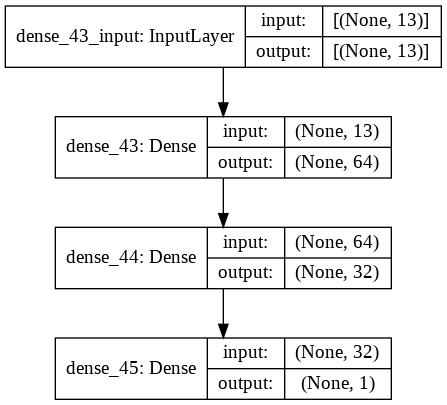

In [72]:
model = models.Sequential()
model.add(layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=1))
plot_model(model,show_shapes=True)

Behalve een netwerk heb je ook een **optimizer** en een keus van **loss** nodig die je gebruikt wanneer je het netwerk traint. Loss definieert wat je wil optimaliseren (bijvoorbeeld MSE: Mean Squared Error) en de optimizer implementeert een specifiek algoritme om te optimaliseren. We kiezen voor RMSE loss en de klassieke optimizer Stochastic Gradient Descent (SGD). Er is tegenwoordig veel keus in optimizers, zoals Adam en RMSProp.  
Naast loss kunnen we ook bepaalde metrieken bijhouden die apart van de loss laten zien hoe goed het model leert, bijvoorbeeld de absolute gemiddelde procentuele fout (mape).  

In [73]:
model.compile(optimizer='SGD', 
                loss = 'mse',
                metrics=['mape']
)

We kunnen het model trainen met model.fit. Het is handig de uitkomst op te slaan in een variabele history, om plots te kunnen maken van het leergedrag. Het trainen van het model bestaat uit updates (steps) en epochs. Een update betekent dat de neuronen van het netwerk worden geupdate op basis van een batch van data. Alle observaties (de rijen in het dataframe) komen in een epoch precies een keer langs. Dus met 404 observaties en batches van 40 observaties krijg je 11 updates per epoch. 
Batches worden willekeurig gekozen, na 20 epochs heeft het model dan 20 keer alle datapunten gezien en 20*11 = 220 keer de modelparameters geupdatet. 

In [74]:
history = model.fit(x = x_train,
                    y = y_train,
                    batch_size = 40,
                    epochs = 20,
                    validation_split = 0.2
                    )


Epoch 1/20
323/323 [==============================] - 1s 2ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 2/20
323/323 [==============================] - 0s 1ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 3/20
323/323 [==============================] - 0s 1ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 4/20
323/323 [==============================] - 0s 1ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 5/20
323/323 [==============================] - 0s 1ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 6/20
323/323 [==============================] - 0s 1ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 7/20
323/323 [==============================] - 0s 1ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 8/20
323/323 [==============================] - 0s 1ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 9/20
323/323 [====

Next we plot the loss and mape curves.

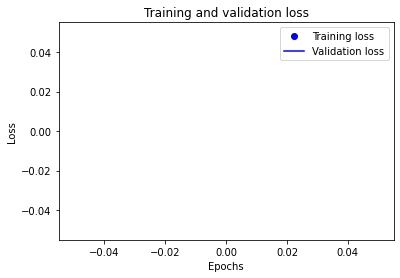

In [79]:
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

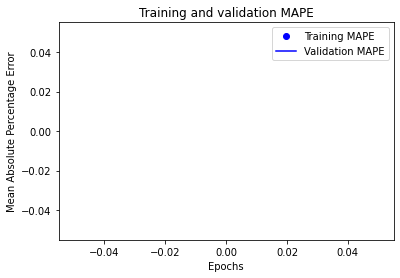

In [80]:
mape = history.history['mape'] 
val_mape = history.history['val_mape']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training MAPE') 
plt.plot(epochs, val_loss, 'b', label='Validation MAPE') 
plt.title('Training and validation MAPE') 
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Percentage Error') 
plt.legend()
plt.show()